### Understanding Central Limit Theorem and T-test

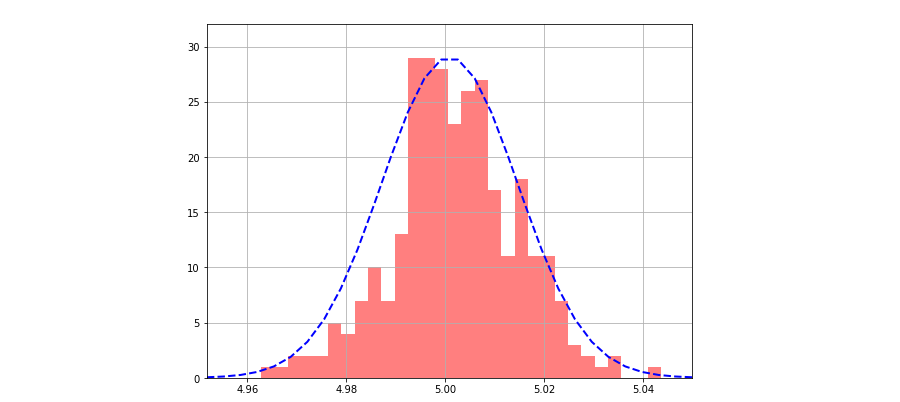

When I first heard about inferential statistics I was amazed by that topic, how can we make conclusions about the population with just samples of it? In some ways it sounded like magic! 

#### Central Limit Theorem (CLT)

CLT states that if we have a population of some variable and take m samples of n-size, and we calculate some parameter in each sample (for example mean, standard deviation, median etc), the distribution of that m parameters will be normal as n increses, and its variance will decrease also as n increases (distribution curve will narrow down). This is true even if the original population does not follow a normal distribution. 

The best way to understand CLT is to practice with some data and obtain the expected results. We are going to use the CLT with 3 distributions comparing the mean, median and the standard deviation.

* Uniform Distribution

* Normal Distribution

* Binomial Distribution

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t
import json
import pprint

In [3]:
# Generating 3 arrays with uniform, random, normal distribution 
# We will set random seed to obtain the same results if we reexecute the code.
np.random.seed(42)
uniform_distribution = np.random.uniform(4, 5.5, 1600) # uniform distribution
normal_distribution = np.random.normal(size=1600, # normal distribution
                                       loc=5,
                                       scale=0.05)
binomial_distribution = np.random.binomial(15, 0.05, 1600) # binomial distribution

In [4]:
df = pd.DataFrame(uniform_distribution, columns=['uniform'])
df['normal'] = pd.DataFrame(normal_distribution, columns=['normal'])
df['binomial'] = pd.DataFrame(binomial_distribution, columns=['binomial'])
df.head()

,uniform,normal,binomial
0,4.561810,4.970916,0
1,5.426071,4.949262,1
2,5.097991,4.967536,0
3,4.897988,4.938803,1
4,4.234028,5.001704,0


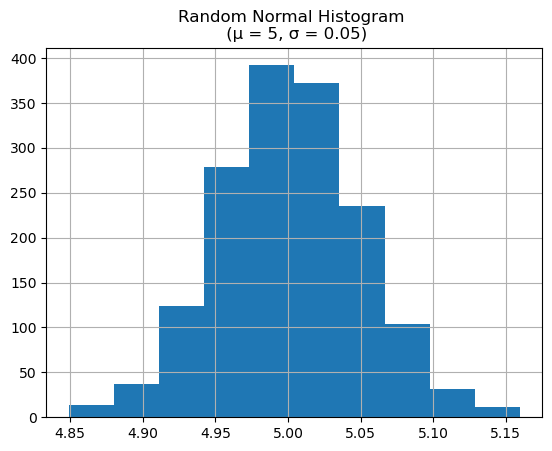

In [5]:
# plotting the histograms for the 3 variables
df.normal.hist()
plt.title('Random Normal Histogram \n (\u03bc = 5, \u03c3 = 0.05)');

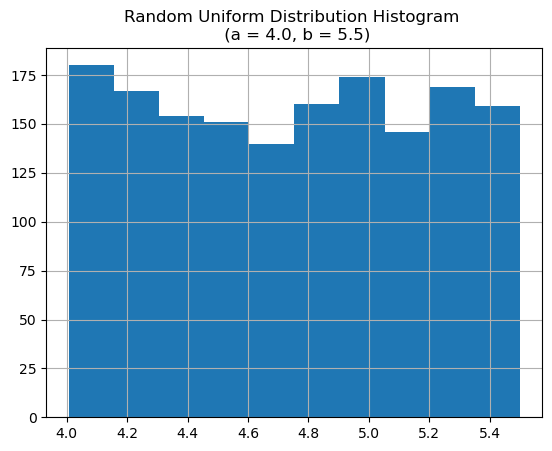

In [6]:
df.uniform.hist()
plt.title("Random Uniform Distribution Histogram \n (a = 4.0, b = 5.5)");

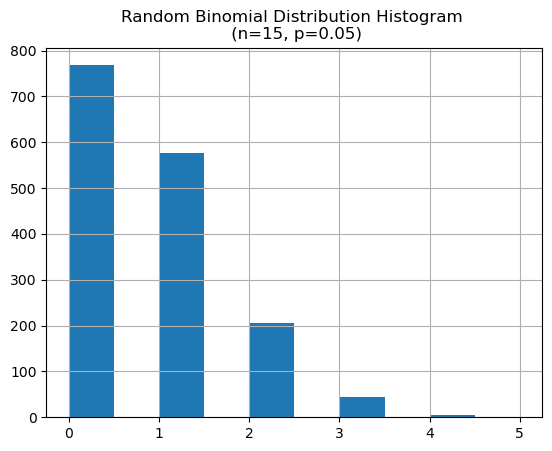

In [7]:
df.binomial.hist()
plt.title('Random Binomial Distribution Histogram \n (n=15, p=0.05)');

In [8]:
# Storing the mean, median and standard deviation of the population
parameters = {
    "uniform_dist": {
        "mean": df.uniform.mean(),
        "median": df.uniform.median(),
        "std": df.uniform.std()
    },
    "normal_dist": {
        "mean": df.normal.mean(),
        "median": df.normal.median(),
        "std": df.normal.std()
    },
    "binomial" : {
        "mean": df.binomial.mean(),
        "median": df.binomial.median(),
        "std": df.binomial.std()
    }
}

In [9]:
print(json.dumps(parameters, indent=4))

{
    "uniform_dist": {
        "mean": 4.747806528172976,
        "median": 4.759842615679644,
        "std": 0.43976063753401085
    },
    "normal_dist": {
        "mean": 5.001599754267347,
        "median": 5.000861698922361,
        "std": 0.04901432417153434
    },
    "binomial": {
        "mean": 0.715625,
        "median": 1.0,
        "std": 0.822452811574647
    }
}


#### Building a function to generate m samples of the (mean, median, std...) of n sized samples

In [10]:
def get_sample_parameter_from_variable(m, n, df, parameter, variable, random_state=42):
    """
    This function takes m random samples of n-size of the specified dataframe column and applies the selected parameter (mean, median, std) to
    each n-size sample. Returns an m-size array with the sample parameters.
    
    Parameters:
    ----------
    m: int (number of samples to take)
    n: int (sample size)
    df: pandas dataframe (where each column is a dataset)
    parameter: str (can be one of the following: 'mean', 'median', 'std'
    variable: str
        Pandas dataframe column (in our example can be one of the following : 'normal', 'uniform', 'binomial')
    random_state: int (optional) Random seed to generate random number generator
    """
    result = []
    for x in range(m):
        df_sample = df[variable].sample(n=n, random_state=random_state)
        if parameter == 'mean':
            result.append(df_sample.mean())
        elif parameter == 'median':
            result.append(df_sample.median())
        elif parameter == 'std':
            result.append(df_sample.std())
        random_state += 1
    return list(result)

Example os usage: Let's say we want to get a list of the mean of 20 random samples (each one with size 35), from the binomial distribution variable.

In [12]:
sample_mean_from_binomial = get_sample_parameter_from_variable(20, 35, df, 'mean', 'binomial')
pprint.pprint(sample_mean_from_binomial)

[0.8571428571428571,
 0.4857142857142857,
 0.6571428571428571,
 0.6857142857142857,
 0.7714285714285715,
 0.7714285714285715,
 0.7142857142857143,
 0.5714285714285714,
 0.7142857142857143,
 0.7428571428571429,
 0.5714285714285714,
 0.8571428571428571,
 0.9714285714285714,
 0.7142857142857143,
 0.8571428571428571,
 0.6857142857142857,
 0.8,
 0.8,
 0.7714285714285715,
 0.8571428571428571]


#### "Checking" Central Limit Theorem by plotting histograms and distribution curves increasing n (sample size)

Now we are going to check the CLT by plotting histograms of sample parameters and show how they change if we increase n (sample size). We will also plot the associated normal curve, and for that we will need to know the "standard error".
Its important to say that CLT is usually applied for the mean, but actually, as we will see, we can apply it for any parameter (median , variances, standard deviation...). This is relevant because, for example, sometimes the median tells more than the mean. 

#### Standard Error

What is Standard Error? It is the standard deviation of the sampling distribution. It decreases as n( sample size) increases. Each parameter will have associated a different standard error formula. 
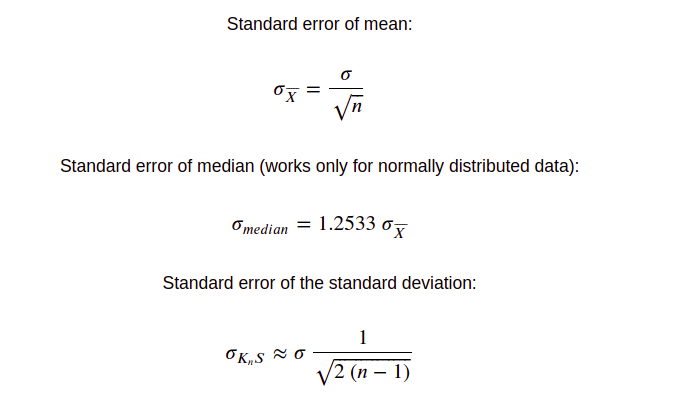

We can "prove" this is true using the previous function. We will compute "manually" the standard deviation and compare it to the formula value, they should be similar.

In [19]:
sample_size_n = 200
sample_mean_from_binomial = get_sample_parameter_from_variable(400, sample_size_n, df, 'mean', 'binomial')
sample_median_from_normal = get_sample_parameter_from_variable(400, sample_size_n, df, 'median', 'normal')
sample_std_from_uniform = get_sample_parameter_from_variable(400, sample_size_n, df, 'std', 'uniform')

# Now we compute "manually" the standard error
sample_mean_from_binomial_std = np.std(sample_mean_from_binomial)
sample_median_from_normal_std = np.std(sample_median_from_normal)
sample_std_from_uniform_std = np.std(sample_std_from_uniform)

# Now we compare the standard error using the mathematical formulae mentioned above
sample_mean_binomial_se = df.binomial.std()/np.sqrt(sample_size_n)
sample_median_normal_se = 1.2533 * (df.normal.std()/np.sqrt(sample_size_n))
sample_std_uniform_se = df.uniform.std() / np.sqrt(2*(sample_size_n - 1))

In [20]:
# Comparing results of computing SE "manually" vs using the formulae
se = {
    f"binomialdist_example (mean,  n={sample_size_n})":{
        "computed_se": sample_mean_from_binomial_std, 
        "formula_se": sample_mean_binomial_se
    },
    f"normaldist_example (median,  n={sample_size_n})":{
        "computed_se": sample_median_from_normal_std, 
        "formula_se": sample_median_normal_se
    },
    f"uniformdist_example (std,  n={sample_size_n})":{
        "computed_se": sample_std_from_uniform_std, 
        "formula_se": sample_std_uniform_se
    }
}
print(json.dumps(se, indent=4))

{
    "binomialdist_example (mean,  n=200)": {
        "computed_se": 0.0504901583850754,
        "formula_se": 0.05815619602703747
    },
    "normaldist_example (median,  n=200)": {
        "computed_se": 0.004247561325654817,
        "formula_se": 0.004343732383749954
    },
    "uniformdist_example (std,  n=200)": {
        "computed_se": 0.013055146058296654,
        "formula_se": 0.02204320895687334
    }
}


#### We can see above the manual and formulae derived results for the three distributions and three parameters are similar

Now we are going to build a function to plot histograms and distribution curves as n (sample size) increases.